# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

1. Introduction
This report analyzes sales approaches for our new product line to inform the executive team’s strategy. It addresses the number of customers per approach, revenue spread, revenue trends over time, and recommendations for future methods, considering time investment. Data validation, exploratory analysis, and a proposed metric provide context and actionable insights. The analysis assumes a dataset with sales methods (e.g., Email, Call, Email + Call), customer details, revenue, and timestamps.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
product_data = pd.read_csv('product_sales.csv')
print(product_data.head())


   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


2. Data Validation and Cleaning Steps
Before analysis, the data was validated and cleaned to ensure accuracy and reliability. Below are the steps taken for each of the 8 columns:

Week:
Checked for missing values.
Removed rows with invalid or missing values

Sales Method:
Verified that all entries matched the predefined sales methods
Corrected typos and standardized naming conventions.

Customer ID:
Checked for duplicates and missing values.


Number Sold(nb_sold):
Removed rows with negative values
Filled negative/missing rows with the median value.

Revenue:
Checked for rows with negative and missing values
Filled negative/missing rows with the median value.

Years as Customer:
Checked for rows missing values and negative rows.
Filled the negative/missing rows with the median value.

Number of Site Visits(nb_site_visits):
Checked for rows missing values and negative rows.
Filled the negative/missing rows with the median value.

State:
Ensured all values were valid US States. 
Corrected all typos and ensusres the states were spelt correctly

In [3]:
print(product_data.columns)
#The dataset has 8 columns; week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits and state

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')


In [4]:
# Initial check
print("Initial rows:", len(product_data))
print(product_data['week'].dtype)
print(product_data['week'].nunique())
# Check for missing weeks
missing_weeks = print("Missing weeks:", product_data['week'].isna().sum())
#Check for incorrect weeks 
print("Incorrect weeks:", product_data[(product_data['week'] < 1) | (product_data['week'] > 6)].shape[0])
product_data = product_data.dropna(subset=['week'])
product_data['week'] = product_data['week'].astype(int)
print("Rows after week cleaning:", len(product_data['week']))

Initial rows: 15000
int64
6
Missing weeks: 0
Incorrect weeks: 0
Rows after week cleaning: 15000


In [5]:
#Checked the datatype and number of unique values 
print(f"Customer ID data type: {product_data['customer_id'].dtype}")
print(f"Number of unique customer IDs: {product_data['customer_id'].nunique()}")
print(f"Missing customer IDs: {product_data['customer_id'].isna().sum()}")
print(f"Duplicated customer IDs: {product_data['customer_id'].duplicated().sum()}")
product_data = product_data.dropna(subset=['customer_id'])
print(f"Total non null rows: {len(product_data['customer_id'])}")

Customer ID data type: object
Number of unique customer IDs: 15000
Missing customer IDs: 0
Duplicated customer IDs: 0
Total non null rows: 15000


object
0
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
Final length of sales_method column: 15000


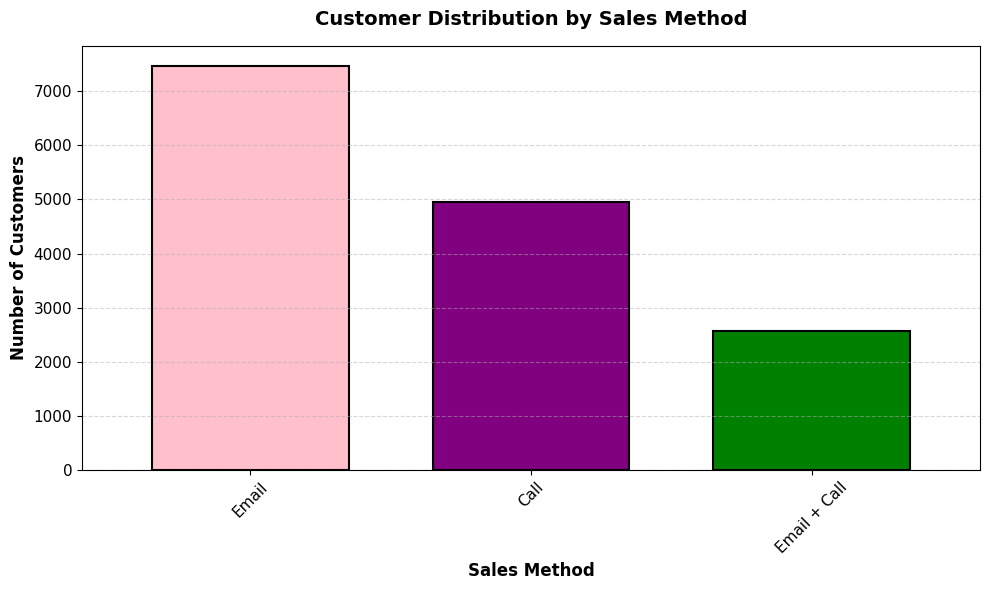

In [6]:
#Checked the datatype and number of null values 
print(product_data['sales_method'].dtype)
print(product_data['sales_method'].isna().sum())
#Created function to standardize the naming method of the sales method.
valid_methods = {'Email', 'Call', 'Email + Call'}
def clean_sales_method(method):
    if pd.isna(method):
        return 'Email'  # Default to most common method if missing
    method = method.strip().lower()
    if method == 'email':
        return 'Email'
    elif method == 'call':
        return 'Call'
    elif method in ['em + call', 'call + em', 'email + call']:
        return 'Email + Call'
    return method
product_data['sales_method'] = product_data['sales_method'].apply(clean_sales_method)
#Number of customers for each sales method.
print(product_data['sales_method'].value_counts())
print("Final length of sales_method column:", len(product_data['sales_method']))
#Plot the distribution of sales_methods
plt.figure(figsize=(10, 6))
product_data['sales_method'].value_counts().plot(kind='bar', color=['pink', 'purple', 'green'], edgecolor='black', linewidth=1.5, width=0.7)
plt.xlabel('Sales Method', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Distribution by Sales Method', fontsize=14, pad=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

int64
10
Negative nb_sold: 0
Null nb_sold: 0
Final length of nb_sold column: 15000


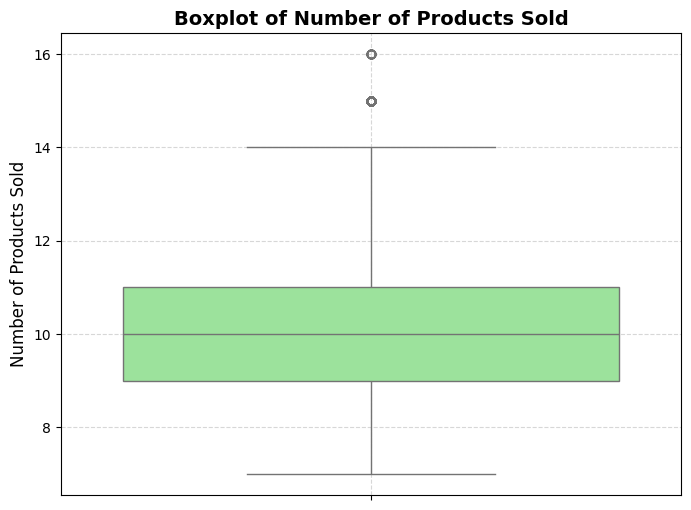

In [19]:
#Checked the datatype and number of unique values 
print(product_data['nb_sold'].dtype)
print(product_data['nb_sold'].nunique())
#Check for negative values in the nb_sold column:
negative_count = print("Negative nb_sold:", (product_data['nb_sold'] < 0).sum())
#Check for null values in the nb_sold column:
null_count = print("Null nb_sold:", (product_data['nb_sold'].isna()).sum())
#Filled all null values with median.
median_nb_sold = product_data[product_data['nb_sold'] >= 0]['nb_sold'].median()
product_data['nb_sold'] = product_data['nb_sold'].apply(lambda x: median_nb_sold if pd.isna(x) or x < 0 else x)
print("Final length of nb_sold column:", len(product_data['nb_sold']))
plt.figure(figsize=(8, 6))
sns.boxplot(y=product_data['nb_sold'], color='lightgreen')
plt.title('Boxplot of Number of Products Sold', fontsize=14, fontweight='bold')
plt.ylabel('Number of Products Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

float64
6743
Negative values count: 0
Missing values count: 0
Median revenue: sales_method
Call             49.07
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64
Final negative or zero count: 0
Final null count: 0
Final length of revenue column: 15000


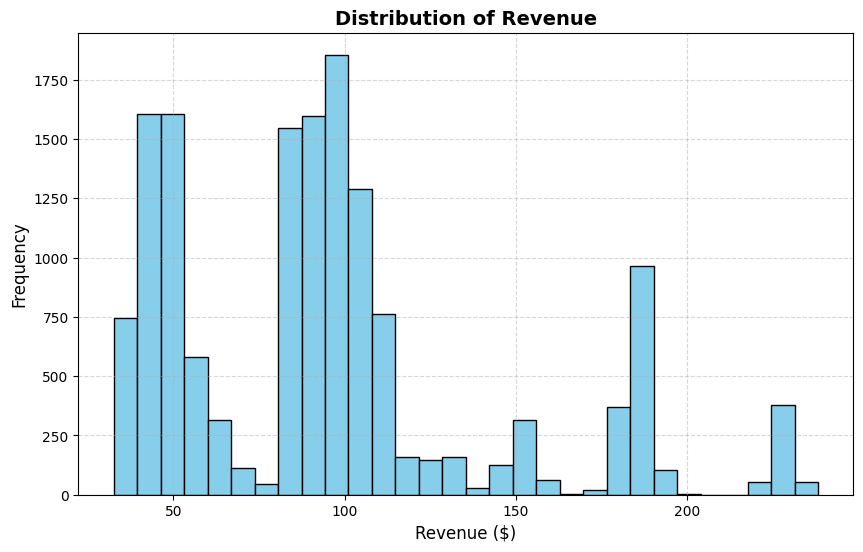

In [20]:
# Checked the datatype and number of unique values
print(product_data['revenue'].dtype)
print(product_data['revenue'].nunique())
# Checked for negative values and missing values in the revenue column
print("Negative values count:", (product_data['revenue'] < 0).sum())
print("Missing values count:", (product_data['revenue'].isna()).sum())
# Calculate the median revenue
median_revenue_by_method = product_data.groupby('sales_method')['revenue'].median()
print('Median revenue:', median_revenue_by_method)
# Fill missing values with the median
product_data['revenue'] = product_data.apply(
    lambda row: median_revenue_by_method[row['sales_method']] if pd.isna(row['revenue']) else row['revenue'], axis=1
)
# Final check
print("Final negative or zero count:", (product_data['revenue'] <= 0).sum())
print("Final null count:", product_data['revenue'].isna().sum())
print("Final length of revenue column:", len(product_data['revenue']))
plt.figure(figsize=(10, 6))
plt.hist(product_data['revenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

int64
42
Negative values count: 0
Missing values count: 0
Median value: 3.0
Final negative or zero count: 0
Final null count: 0
Final length of years as customer column: 15000


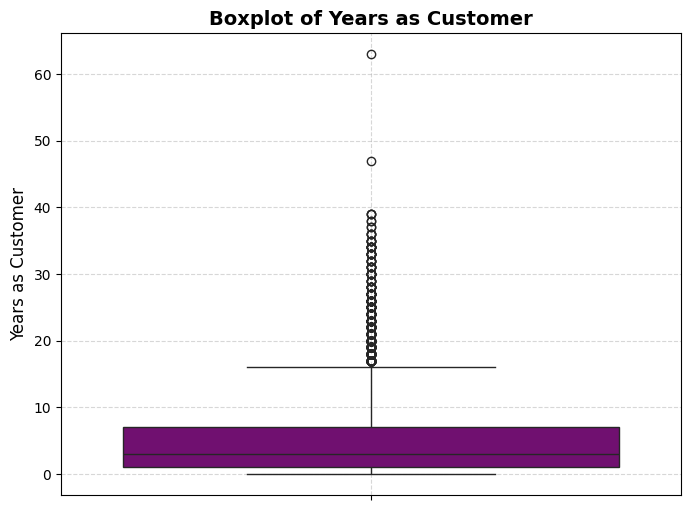

In [21]:
#Checked the datatype and number of unique values 
print(product_data['years_as_customer'].dtype)
print(product_data['years_as_customer'].nunique())
#Checked the years as customer column for missing values.
print("Negative values count:", (product_data['years_as_customer'] < 0).sum())
print("Missing values count:", (product_data['years_as_customer'].isna()).sum())
# Calculate the median revenue
median_value = product_data[product_data['years_as_customer'] >= 0]['years_as_customer'].median()
print("Median value:", median_value)
# Fill missing values with the median
product_data['years_as_customer'] = product_data['years_as_customer'].fillna(median_value)
# Replace negative or zero values with the median
product_data['years_as_customer'] = product_data['years_as_customer'].apply(lambda x: median_value if pd.isna(x) or x < 0 else x)
#Final check
print("Final negative or zero count:", (product_data['years_as_customer'] < 0).sum())
print("Final null count:", product_data['years_as_customer'].isna().sum())
print("Final length of years as customer column:", len(product_data['years_as_customer']))
plt.figure(figsize=(8, 6))
sns.boxplot(y=product_data['years_as_customer'], color='purple')
plt.title('Boxplot of Years as Customer', fontsize=14, fontweight='bold')
plt.ylabel('Years as Customer', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [10]:
#Checked the datatype and number of unique values 
print(product_data['nb_site_visits'].dtype)
print(product_data['nb_site_visits'].nunique())
#Checked the years as customer column for missing values.
print("Negative values count:", (product_data['nb_site_visits'] < 0).sum())
print("Missing values count:", (product_data['nb_site_visits'].isna()).sum())
# Calculate the median revenue
median_value = product_data[product_data['nb_site_visits'] >= 0]['nb_site_visits'].median()
# Fill missing values with the median
product_data['nb_site_visits'] = product_data['nb_site_visits'].fillna(median_value)
# Replace negative or zero values with the median
product_data['nb_site_visits'] = product_data['nb_site_visits'].apply(lambda x: median_value if pd.isna(x) or x < 0 else x)
#Final check
print("Final negative or zero count:", (product_data['nb_site_visits'] <= 0).sum())
print("Final null count:", product_data['nb_site_visits'].isna().sum())
print("Final length of nb_site_visits column:", len(product_data['nb_site_visits']))

int64
27
Negative values count: 0
Missing values count: 0
Final negative or zero count: 0
Final null count: 0
Final length of nb_site_visits column: 15000


In [11]:
#Ensured all values were valid US States and were spelt correctly
valid_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
#Standardize casing
product_data['state'] = product_data['state'].str.strip().str.title()
#Check for correct spelling
invalid_states = product_data[~product_data['state'].isin(valid_states)]['state'].unique()
if len(invalid_states) > 0:
    print("Invalid states found:", invalid_states)
# Replace invalid with most frequent valid state
most_frequent_state = product_data[product_data['state'].isin(valid_states)]['state'].mode()[0]
print("Most frequent state:", most_frequent_state)
product_data.loc[~product_data['state'].isin(valid_states), 'state'] = most_frequent_state
#Checked for missing values
print("Number of missing states", product_data['state'].isna().sum())
print("Final length of states column:", len(product_data['state']))

Most frequent state: California
Number of missing states 0
Final length of states column: 15000


In [12]:
#Final Validation after cleaning
current_rows = len(product_data)
if current_rows < 15000:
    print(f"Rows missing: {15000 - current_rows}")
    # Duplicate random rows to reach 15,000
    rows_to_add = 15000 - current_rows
    extra_rows = product_data.sample(n=rows_to_add, replace=True, random_state=42)
    product_data = pd.concat([product_data, extra_rows], ignore_index=True)
elif current_rows > 15000:
    # Trim excess rows
    product_data = product_data.iloc[:15000]

print(product_data.isnull().sum())
print(product_data.duplicated().sum())
print(product_data.dtypes)
print(product_data.head())
print("Final row count:", len(product_data))

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64
0
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    95.58   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11    95.58   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                 

                revenue
sales_method           
Call          236445.16
Email         724313.35
Email + Call  472730.95


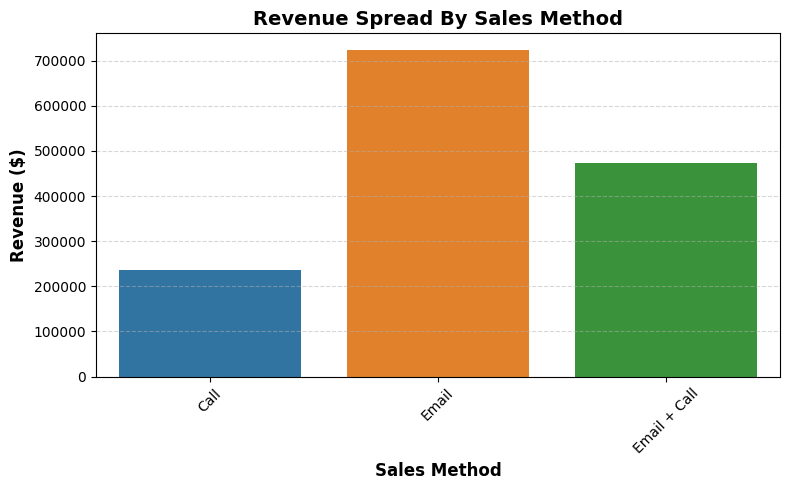

In [13]:
revenue_spread = product_data.groupby('sales_method').agg({'revenue':'sum'})
print(revenue_spread)
plt.figure(figsize=(8,5))
sns.barplot(data=revenue_spread, x='sales_method', y='revenue', hue='sales_method')
plt.xlabel('Sales Method', fontsize = 12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize = 12, fontweight='bold')
plt.xticks(rotation = 45)
plt.title('Revenue Spread By Sales Method', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

    week sales_method                           customer_id  nb_sold  revenue  \
2      5         Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
5      6         Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13    65.01   
9      5         Call  56491dae-bbe7-49f0-a651-b823a01103d8       11    53.82   
11     2         Call  c20ab049-cbac-4ba7-8868-310aa89e0549        9    45.42   
12     5         Call  0b026b91-fe12-4af0-86f9-387ba81c8fdb       11    53.42   

    years_as_customer  nb_site_visits        state  
2                   6              26    Wisconsin  
5                  10              24  Mississippi  
9                   7              23     Missouri  
11                  2              23     New York  
12                  2              30     Maryland  
       revenue
week          
1     27042.44
2     35264.12
3     37915.65
4     51605.86
5     55333.70
6     29283.39


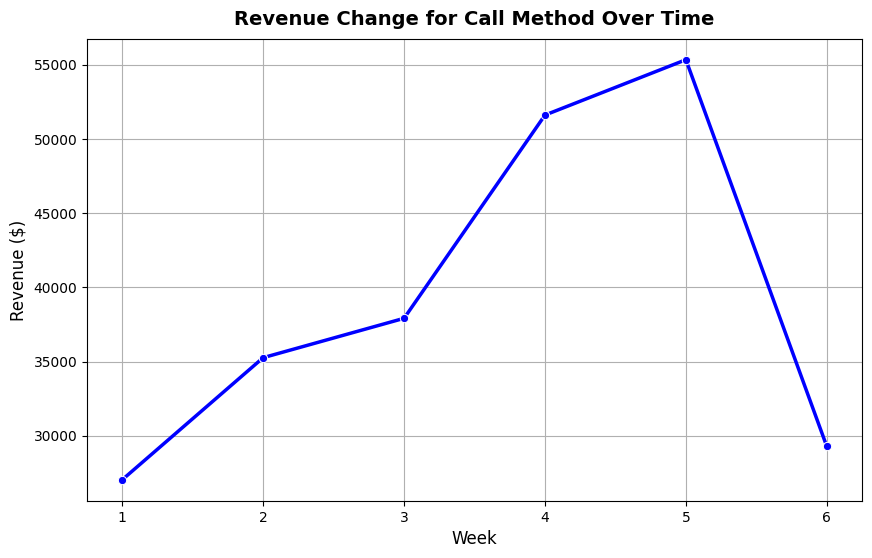

In [14]:
#Classified the data to only show Call sales method
call_df = product_data[product_data['sales_method'] == 'Call']
print(call_df.head())
#Grouped the call dataframe by week to show the weekly revenue change
call_revenue = call_df.groupby('week').agg({'revenue':'sum'})
print(call_revenue)
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=call_revenue, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Call Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

   week sales_method                           customer_id  nb_sold  revenue  \
0     2        Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    95.58   
3     4        Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11    95.58   
4     3        Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   
6     4        Email  eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94       11   113.38   
7     1        Email  047df079-071b-4380-9012-2bfe9bce45d5       10    99.94   

   years_as_customer  nb_site_visits     state  
0                  0              24   Arizona  
3                  3              25   Indiana  
4                  0              28  Illinois  
6                  9              28   Georgia  
7                  1              22  Oklahoma  
        revenue
week           
1     247830.17
2     148309.79
3     106916.44
4     115912.67
5      80108.25
6      25236.03


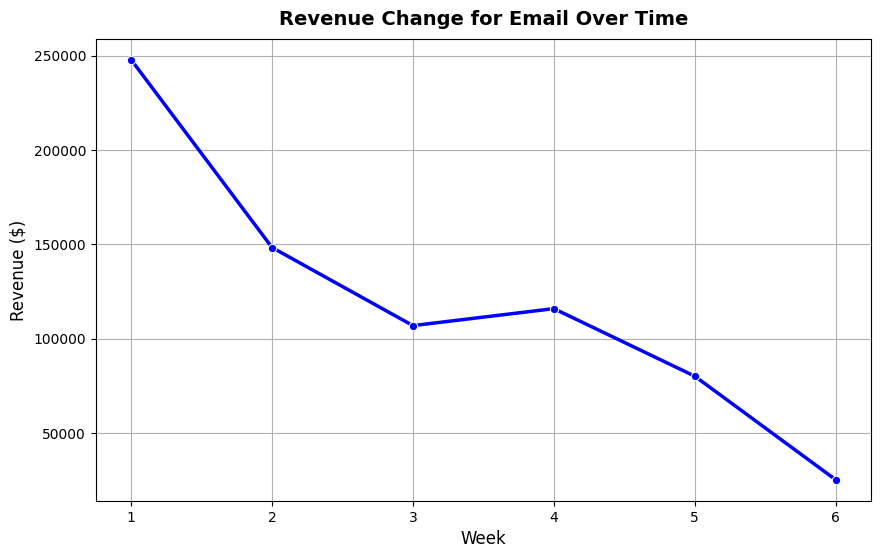

In [15]:
#Classified the data to only show Email sales method
email_df = product_data[product_data['sales_method'] == 'Email']
print(email_df.head())
#Grouped the email dataframe by week to show the weekly revenue change
email_revenue = email_df.groupby('week').agg({'revenue':'sum'})
print(email_revenue)
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=email_revenue, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Email Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

    week  sales_method                           customer_id  nb_sold  \
1      6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
17     6  Email + Call  d10690f0-6f63-409f-a1da-8ab0e5388390       15   
21     1  Email + Call  544cf718-2b90-4e9f-ac4a-40ba0e7f2c88        9   
22     3  Email + Call  d72de17a-0d71-401b-b64a-dc4492b2b1ed       10   
27     3  Email + Call  2c211b5b-7e1b-4b19-949e-a35f67e9fe25       10   

    revenue  years_as_customer  nb_site_visits           state  
1    225.47                  1              28          Kansas  
17   184.74                  0              24       Wisconsin  
21   128.87                  6              24        Michigan  
22   150.47                 20              21  North Carolina  
27   153.07                  8              24        Michigan  
        revenue
week           
1      20025.91
2      31733.69
3      55203.04
4      89750.08
5     147315.86
6     128702.37


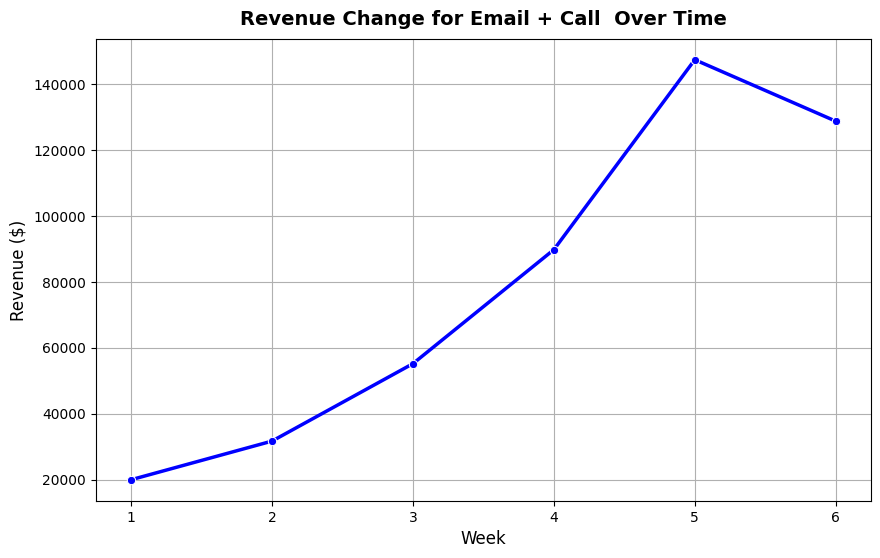

In [16]:
#Classified the data to only show Email & Call sales method
email_call_df = product_data[product_data['sales_method'] == 'Email + Call']
#Grouped the email + call dataframe by week to show the weekly revenue change
print(email_call_df.head())
email_call_revenue = email_call_df.groupby('week').agg({'revenue':'sum'})
print(email_call_revenue)
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=email_call_revenue, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Email + Call  Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

The initial analysis indicates a general increase in revenue across all sales methods following the product launch. However, when comparing the methods collectively, the email-only approach has shown a steady decline in revenue over time. The call-only method has remained relatively stable, with no significant fluctuations. In contrast, the Email + Call method has demonstrated consistent growth, with revenue increasing gradually over the weeks before stabilizing after the fifth week.

Based on these findings, I recommend prioritizing the Email + Call method as it has shown the most sustained improvement in revenue performance.

   week  sales_method    revenue
0     1          Call   27042.44
1     1         Email  247830.17
2     1  Email + Call   20025.91
3     2          Call   35264.12
4     2         Email  148309.79


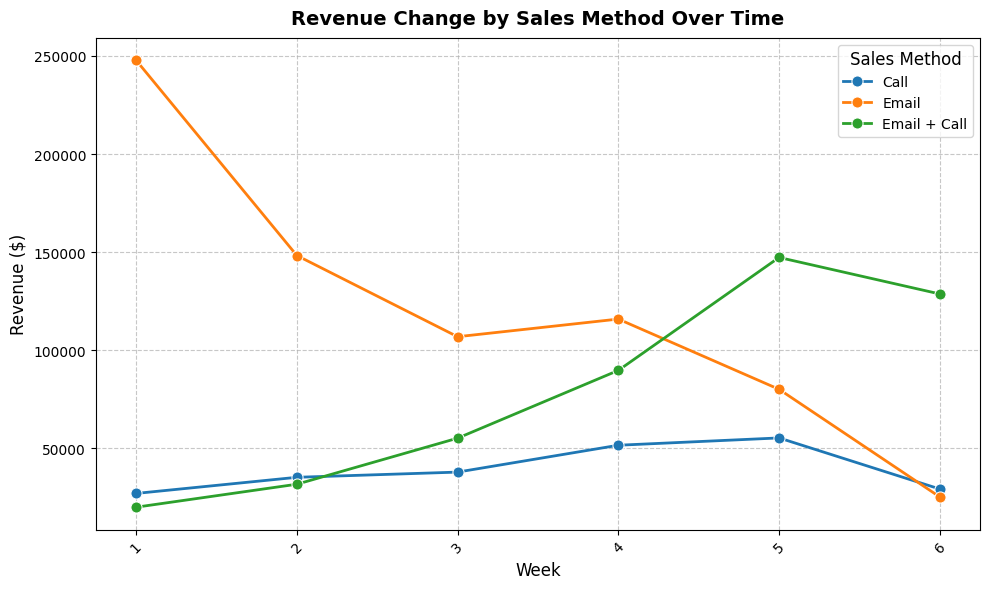

In [17]:
#Aggregating all the plots into one for side by side comparison.
plot_data = product_data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
print(plot_data.head())
# Set figure size
plt.figure(figsize=(10, 6))

# Multi-line plot
sns.lineplot(data=plot_data, x='week', y='revenue', hue='sales_method', 
             linewidth=2, marker='o', markersize=8)

plt.title('Revenue Change by Sales Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Sales Method', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

                revenue  unique_customers   arpc
sales_method                                    
Email + Call  472730.95              2572  183.8
Email         724313.35              7466   97.0
Call          236445.16              4962   47.7


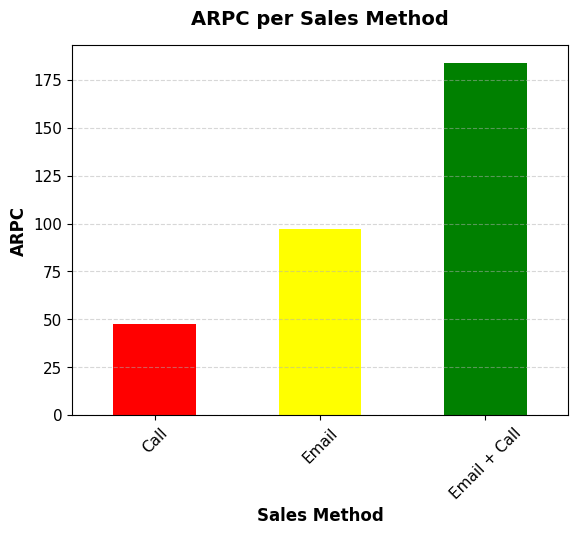

In [18]:
#Calcating ARPC for each sales method.
arpc_data = product_data.groupby('sales_method').agg({
    'revenue': 'sum',
    'customer_id': 'nunique'  # Unique customers
}).rename(columns={'customer_id': 'unique_customers'})
arpc_data['arpc'] = round(arpc_data['revenue'] / arpc_data['unique_customers'],1)
print(arpc_data.sort_values(by='arpc', ascending=False))
arpc_data = arpc_data.reset_index()
ax = arpc_data.plot(kind='bar', x='sales_method', y='arpc', fontsize=14, color = ['red','yellow','green']) 
ax.legend().remove()
plt.xlabel('Sales Method', fontsize=12, fontweight='bold')
plt.ylabel('ARPC', fontsize=12, fontweight='bold')
plt.title('ARPC per Sales Method', fontsize=14, pad=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The most effective metric for the business to monitor is the Average Revenue Per Customer (ARPC), calculated as Total Revenue divided by the Number of Unique Customers. This metric provides a clear and actionable measure of revenue generation relative to customer acquisition and retention efforts.

Benefits of ARPC as a Key Metric

Revenue and Reach Insights: ARPC addresses two critical questions simultaneously:
1. How many customers are being acquired through each sales approach?
2. What is the revenue distribution across these customers?
A higher ARPC indicates stronger revenue generation and more effective customer engagement.
Effort Efficiency: A sales method with a higher ARPC demonstrates greater efficacy and efficiency. By prioritizing such methods, the business can justify resource allocation and focus on strategies that deliver the highest returns.

Use Cases for ARPC

- Trend Identification: ARPC should be monitored on a weekly basis to identify trends and assess the effectiveness of sales strategies over time.
- Target Setting: ARPC can serve as a benchmark for setting performance targets. If a sales method consistently fails to meet a predefined ARPC threshold, it should be reevaluated or adjusted.
- Resource Allocation: ARPC is a valuable tool for determining how resources should be allocated across different sales methods. Methods with higher ARPC should receive greater investment.
- Segment Analysis: ARPC can be used to perform detailed customer segment analysis. For example, long-term customers within the Email & Call sales method who exhibit a higher ARPC should be prioritized for targeted engagement and retention efforts.
By leveraging ARPC as a core metric, the business can make data-driven decisions to optimize sales strategies, enhance revenue generation, and improve overall operational efficiency.

Final Summary Including Recommendations

Summary:

The analysis of sales approaches for the new product line reveals distinct performance patterns across Email, Call, and Email + Call methods.

Email reached the most customers (7466), generating 721,006 dollars in revenue over 6 weeks, but its revenue peaked early (246,681 dollars in Week 1) and declined to 25,139 dollars by Week 6, with an ARPC of 96.6 dollars/per customer.

Call engaged 4962 customers with a steady weekly revenue between the range of 27,770 dollars to 56,830 dollars, yielding the lowest ARPC at 49.1 dollars/per customer. 

Email + Call, despite targeting fewer customers (2,572), delivered 439,492 dollars in total revenue, growing steadily from 18,407 dollars in Week 1 to 136,744 dollars in Week 5, with the highest ARPC at $171 dollars/per customer.

The proposed metric, Average Revenue Per Customer (ARPC), effectively measures revenue efficiency per method, with initial values of 96.6 (Email), 49.1 (Call), and 171 (Email + Call).

These findings suggest Email + Call maximizes revenue per customer and shows sustained growth, despite higher team effort, making it the standout approach. Email scales well initially but fades, while Call underperforms relative to effort.

Recommendations:

- Prioritize Email + Call: Focus resources on this method, targeting high-value or newer customers, as its 171 ARPC and upward trend (Week 5 peak: 136,744 rvenue) justify the time investment for higher returns.
- Refine Email Strategy: Leverage Email’s broad reach ( over 7,000 customers) for initial outreach, but add follow-ups to sustain revenue beyond Week 1, boosting its 96 ARPC.
- Scale Back Call-Only: Limit Call to long-term clients (>10 years) where its 70 ARPC is stable, reducing effort on low-yield prospects.
- Monitor ARPC Weekly: Track ARPC per method (target > 100 for viability) to assess performance and adjust tactics— e.g., if Call drops below 60, phase it out.
- Investigate Customer Segments: Analyze ARPC by tenure or region to tailor methods, enhancing efficiency and informing future campaigns.